<a href="https://colab.research.google.com/github/mordiouf/Projet-Analyse/blob/main/Mor_projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
os.listdir('/gdrive/MyDrive/Data')

['dataset_diabetes_diabetic_data.csv', 'insuffisants cardiaques.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

**Importation des donnees**

In [ ]:
data =  pd.read_csv('/gdrive/MyDrive/Data/insuffisants cardiaques.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#**Description des donnees**

In [ ]:
print('lignes  : ',data.shape[0]) # Nombre de lignes
print('colonnes : ',data.shape[1]) # Nombre de colonnes
print('\nVariables  : \n',data.columns.tolist()) # All features
print('\nvaleurs nulles  : \n',data.isnull().sum().values.sum()) # Les Valeus manquantes
print('\nvaleurs uniques : \n',data.nunique()) # Les Variables qui ne se repetent pas
print('\nQuelques infos : \n',data.info()) # Informations sur les types de variables

lignes  :  299
colonnes :  13

Variables  : 
 ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

valeurs nulles  : 
 0

valeurs uniques : 
 age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia      

**Proportion d'individus morts par l'insuffisance cardiaque**

In [ ]:
round((data.DEATH_EVENT.value_counts()[1] / data.DEATH_EVENT.count())*100,2)

32.11

#**Statistique Descriptive de nos Donnees**

In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#**Matrice de Correlation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


(13.7, -0.7)

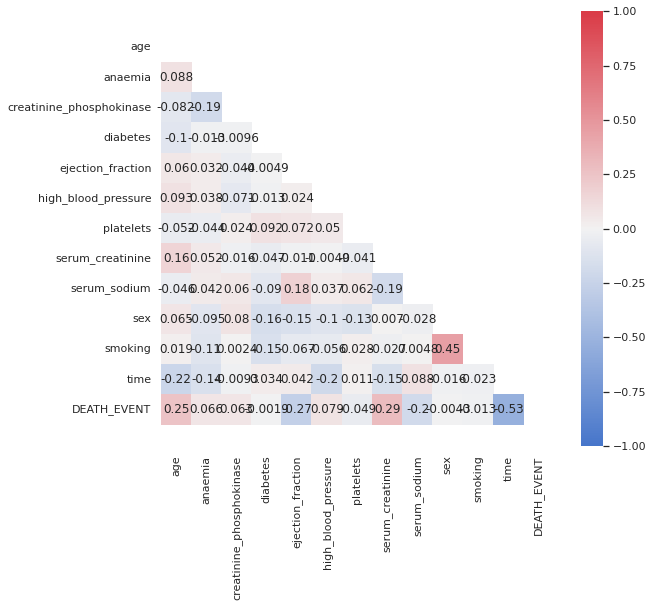

In [ ]:
# visualisation de la matrice de corrélation
sns.set(style="white")
# Générer un masque pour le triangle supérieur
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Configurez la figure matplotlib pour contrôler la taille de la carte thermique
fig, ax = plt.subplots(figsize=(10,8))
# Créer une palette de couleurs personnalisée
cmap = sns.diverging_palette(255, 10, as_cmap=True)
# Tracer la carte thermique
sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, ax=ax)
# Empêcher le problème de coupure de Heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.7, top-0.7)

#**Analyser la Distribution**

In [1]:
features = ['age','creatinine_phosphokinase','diabetes','ejection_fraction','serum_creatinine','platelets','serum_sodium','time']

ROWS, COLS = 2,4
fig, ax = plt.subplots(ROWS,COLS, figsize=(18,8))
row, col = 0, 0
for i,feature in enumerate(features):
    if col==COLS-1:
        row +=1
    col = i%COLS
    
    data[data.DEATH_EVENT==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    data[data.DEATH_EVENT==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['Non DEATH','DEATH'])
fig.subplots_adjust(hspace=0.3)

NameError: ignored

Comme DEATH_EVENT est corrélé avec **âge**,**ejection_fraction** et **Serum_creatinine**, On voit que: Parmi les personnes mortes de l'insuffisance cardiaque aucune n'a moins de 43ans ni un taux de Serum_creatinine inférieur à 0.5 ni un taux ejection_fraction inferieur a 10 ou superieur a 70

**Creer un feature X et target Y dans notre jeu de données**

In [ ]:
X, y = data.drop('DEATH_EVENT', axis=1), data['DEATH_EVENT']

#**Partitionnement des donnees en traing_Set et testing_Set**

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0, stratify=y)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('X_test',y_test.shape)

X_train (239, 12)
X_test (60, 12)
y_train (239,)
X_test (60,)


#**Exemple avec le modele KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

print("Test Score:", model.score(X_test,y_test))

Test Score: 0.6833333333333333


#**Modelisation avec sklearn**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

In [ ]:
prepros = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
RandomForest = make_pipeline(prepros, RandomForestClassifier(random_state=0))
SVM = make_pipeline(prepros, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(prepros, StandardScaler(), KNeighborsClassifier())
logistics = make_pipeline(prepros, StandardScaler(), LogisticRegression())

In [ ]:
dict_of_models = {'RandomForest': RandomForest,
                 'SVM': SVM,
                 'KNN': KNN,
                  'logistics': logistics
                 }

#**Procedure d'evaluation**

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest
[[39  2]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

SVM
[[39  2]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

KNN
[[40  1]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

logistics
[[39  2]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

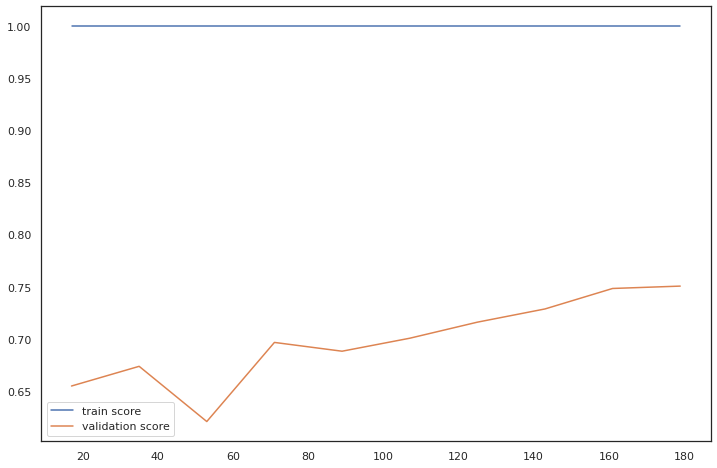

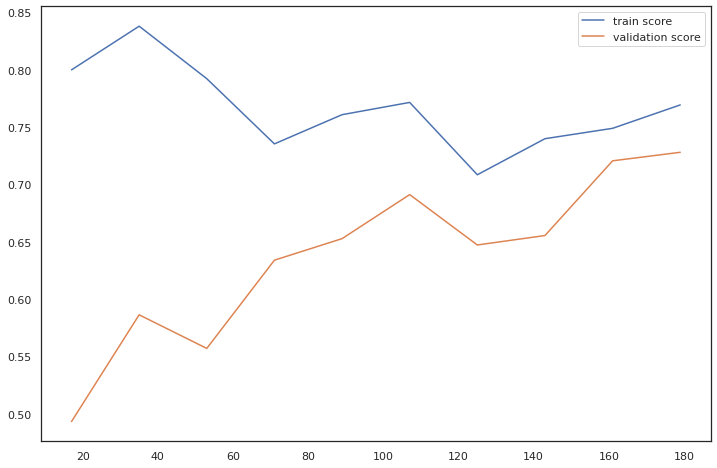

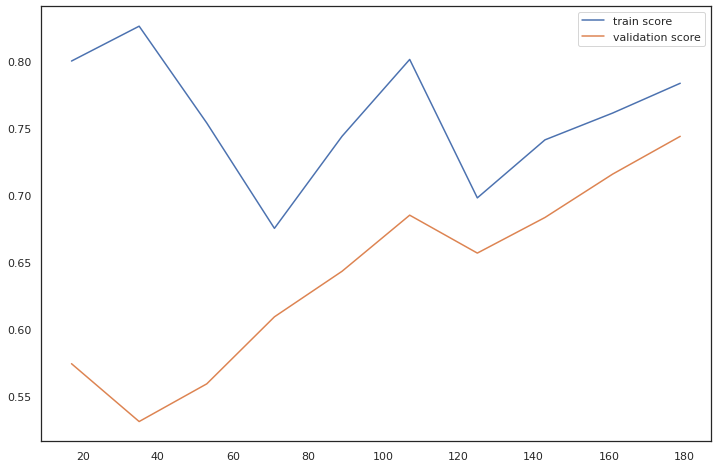

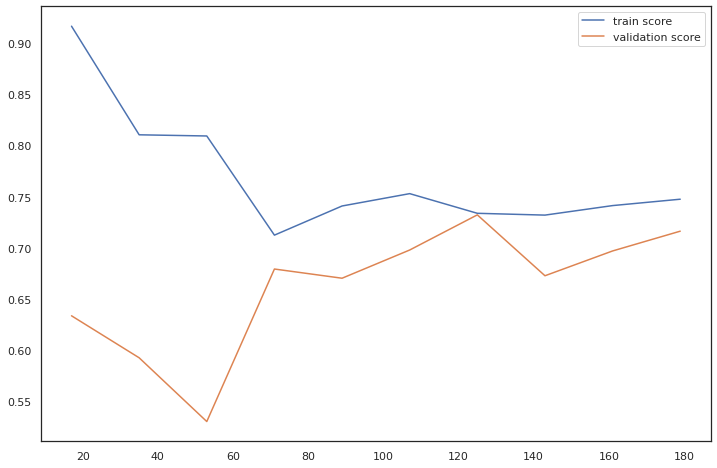

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

On prend de meilleur f1-Score pour choisir un model:

> 
RandomForestClassifier:0.76

> 
KNeighborsClassifier: 0.75
> 
LogisticRegression: 0.76
>
SVC: 0.73
>
>
Graphiquement on voit que les courbes de la regression logistique se touchent 
>
Donc peut choisir LogisticRegression

#**Optimisation du modele logistic** : *Cross Validation*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logistics

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

On va ameliorer la performance de notre modele LogisticRegression() , en faisant des ajustements sur ces parametres. 
>
On utilise GridSearchCV

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logistics=LogisticRegression()
logistics_cv=GridSearchCV(logistics,grid,cv=10)
logistics_cv.fit(X_train,y_train)

print("Meilleur parametres",logistics_cv.best_params_)
print("Precision :",logistics_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Meilleur parametres {'C': 0.001, 'penalty': 'l2'}
Precision : 0.8076086956521739


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))


score 0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#**Precision Recall**

On va finaliser la creation de notre modele en observant le courbe precision-recall et en deffissant un seuil de prediction pour notre modele

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, logreg2.decision_function(X_test))

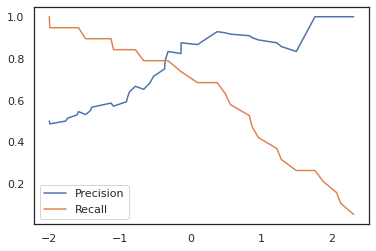

In [ ]:
plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.legend()

On observe que si on prend un seuil de decision egal a -2, le Recall sera proche des 100% cela veut dire que 100% des patiens sont mort de l'insuffisance cardiaque par conte la precision va tourner autour des 50% car y'aura des personnes qui ne sont par mort de l'insuffisance cardiaque et qui sont compter parmis les morts.
On va tenter de trouver un threshold (seuil) qui va nous donner le meilleur recall avec la meilleur precision.En general c'est le croisement des deux courbes

#**Fonction de Prediction**

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

# On choisit un seuil -1
y_pred = model_final(logreg2, X_test, threshold=-1)

In [ ]:
from sklearn.metrics import recall_score

f1_score(y_test, y_pred)

0.6956521739130435

In [ ]:
recall_score(y_test, y_pred)

0.8421052631578947

Prenons une personne au hasard et verifions s'il sera mort par insuffisance cardiaque

In [ ]:
X_new = np.array([[75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4]]) 
print("X_new shape: {}".format(X_new.shape))

X_new shape: (1, 12)


In [ ]:
def prediction(X_new):
    prediction = logreg2.predict(X_new)
    if prediction==1:
        print("Cette personne a une forte chance de mourir de l'insuffisance cardiaque")
        print("Avec une Probabilite de ",logreg2.predict_proba(X_new)[:,1],"%")
    else:
        print("Cette personne a une forte chance de survivre de l'insuffisance cardiaque")
        print("Avec une Probabilite de ",logreg2.predict_proba(X_new)[:,0],"%")
        
prediction(X_new)

Cette personne a une forte chance de mourir de l'insuffisance cardiaque
Avec une Probabilite de  [0.9438622] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
